In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
def load_data():
  data = pd.read_excel('stemming_label_2.xlsx')
  return data

df = load_data()
df.head()

,isi,label
0,bonus guna metode bayar transaksi sesuai prose...,NEGATIVE
1,suka belanja tokopedia diskon kembali dana bar...,NEGATIVE
2,tokopedia keren gratis ongkos kirim pelit prom...,POSITIVE
3,baru buruk kali buka produk sebentar beranda u...,NEGATIVE
4,mohon sembunyi toko aktif produk habis jual ak...,NEGATIVE


#Vectorize

In [ ]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['isi'],df['label'],test_size=0.2, random_state=10)

In [ ]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y)
test_y = Encoder.transform(test_y)

In [ ]:
vect = TfidfVectorizer()
vect.fit(train_x)

train_x_tfidf = vect.fit_transform(train_x)
test_x_tfidf = vect.transform(test_x)

In [ ]:
print("X_train_shape : ",train_x_tfidf.shape)
print("X_test_shape : ",test_x_tfidf.shape)
print("y_train_shape : ",train_y.shape)
print("y_test_shape : ",test_y.shape)

X_train_shape :  (800, 1690)
X_test_shape :  (200, 1690)
y_train_shape :  (800,)
y_test_shape :  (200,)


In [ ]:
print("x_train : \n",train_x_tfidf)
print("\n x_test : \n",test_x_tfidf)
print("\n y_train : \n",train_y)
print("\n y_test : \n",test_y)

x_train : 
   (0, 1096)	0.17347457609537556
  (0, 508)	0.17347457609537556
  (0, 1611)	0.21050275949415478
  (0, 1407)	0.25895314276674297
  (0, 474)	0.24228589072736192
  (0, 915)	0.2359492955892238
  (0, 1339)	0.19078918799272027
  (0, 1141)	0.12424118816930889
  (0, 1477)	0.19078918799272027
  (0, 1200)	0.5415574925689688
  (0, 1382)	0.15121140663976285
  (0, 1190)	0.143716805307787
  (0, 723)	0.16891887762899702
  (0, 137)	0.18623924854808815
  (0, 161)	0.10434336489631146
  (0, 1568)	0.12663641912344262
  (0, 222)	0.17347457609537556
  (0, 1058)	0.17098250999301406
  (0, 1349)	0.28744599832386547
  (0, 1263)	0.2304602872096205
  (0, 1573)	0.06181497192759314
  (1, 885)	0.17675784673711387
  (1, 863)	0.3229017454670091
  (1, 180)	0.15693922364712357
  (1, 1310)	0.17675784673711387
  :	:
  (798, 1324)	0.1531212503854072
  (798, 439)	0.15191921965486363
  (798, 157)	0.20351862702405288
  (798, 1660)	0.41029063907793545
  (798, 341)	0.13241649581127757
  (798, 1616)	0.1352545309342693

#Multinomial Naive Bayes

In [ ]:
MNB = MultinomialNB()
MNB.fit(train_x_tfidf, train_y)

MultinomialNB()

In [ ]:
scores = cross_val_score(MNB, train_x_tfidf, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(MNB, train_x_tfidf, train_y, cv=10).mean())

[0.9    0.9    0.8375 0.85   0.9    0.875  0.9125 0.8625 0.8875 0.8875]
K-Fold Mean ->  0.88125


In [ ]:
MNB_pred = MNB.predict(test_x_tfidf)

In [ ]:
print(confusion_matrix(MNB_pred, test_y))
print("MNB Accuracy Score -> ",accuracy_score(test_y, MNB_pred)*100)
print("MNB Recall Score -> ",recall_score(test_y, MNB_pred)*100)
print("MNB Precision Score -> ",precision_score(test_y, MNB_pred)*100)
print("MNB f1 Score -> ",f1_score(test_y, MNB_pred)*100)

[[97 21]
 [11 71]]
MNB Accuracy Score ->  84.0
MNB Recall Score ->  77.17391304347827
MNB Precision Score ->  86.58536585365853
MNB f1 Score ->  81.60919540229885


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       108
           1       0.87      0.77      0.82        92

    accuracy                           0.84       200
   macro avg       0.84      0.83      0.84       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:


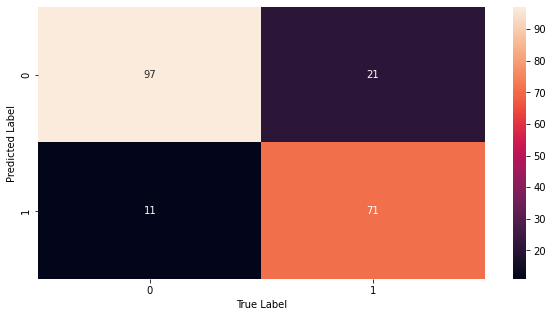



True Positive :  71
True Negative :  97
False Positive :  11
False Negative  :  21


In [ ]:
print("Classification Report:")
print(classification_report(test_y, MNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(MNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, MNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, MNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.16


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_MNB = pd.DataFrame({'prediksi':MNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_MNB = pd.DataFrame(df_result_MNB['prediksi'].value_counts()/df_result_MNB['prediksi'].count()*100)
df_persen_MNB

,prediksi
0,59.00%
1,41.00%


#Bernoulli Naive Bayes

In [ ]:
BNB = BernoulliNB()
BNB.fit(train_x_tfidf, train_y)

BernoulliNB()

In [ ]:
scores = cross_val_score(BNB, train_x_tfidf, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(BNB, train_x_tfidf, train_y, cv=10).mean())

[0.85   0.9    0.8125 0.8625 0.8875 0.9125 0.8625 0.9125 0.8625 0.925 ]
K-Fold Mean ->  0.8787499999999999


In [ ]:
BNB_pred = BNB.predict(test_x_tfidf)

In [ ]:
print(confusion_matrix(BNB_pred, test_y))
print("BNB Accuracy Score -> ",accuracy_score(test_y, BNB_pred)*100)
print("BNB Recall Score -> ",recall_score(test_y, BNB_pred)*100)
print("BNB Precision Score -> ",precision_score(test_y, BNB_pred)*100)
print("BNB f1 Score -> ",f1_score(test_y, BNB_pred)*100)

[[92 16]
 [16 76]]
BNB Accuracy Score ->  84.0
BNB Recall Score ->  82.6086956521739
BNB Precision Score ->  82.6086956521739
BNB f1 Score ->  82.6086956521739


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       108
           1       0.83      0.83      0.83        92

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:


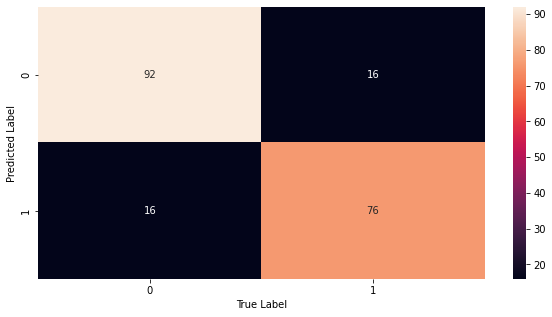



True Positive :  76
True Negative :  92
False Positive :  16
False Negative  :  16


In [ ]:
print("Classification Report:")
print(classification_report(test_y, BNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(BNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, BNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, BNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.16


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_BNB = pd.DataFrame({'prediksi':BNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_BNB = pd.DataFrame(df_result_BNB['prediksi'].value_counts()/df_result_BNB['prediksi'].count()*100)
df_persen_BNB

,prediksi
0,54.00%
1,46.00%


#Hitung nilai C

In [ ]:
for c in [0.01, 0.05, 0.25, 0.5, 1, 1.01, 1.05, 1.25, 1.5, 2]: # Menghitung nilai C
	sv = SVC(C=c)
	sv.fit(train_x_tfidf, train_y)
	print('Accuracy fot C=%s: %s'
	%(c,accuracy_score(test_y, sv.predict(test_x_tfidf)))) 

Accuracy fot C=0.01: 0.54
Accuracy fot C=0.05: 0.54
Accuracy fot C=0.25: 0.77
Accuracy fot C=0.5: 0.84
Accuracy fot C=1: 0.84
Accuracy fot C=1.01: 0.84
Accuracy fot C=1.05: 0.84
Accuracy fot C=1.25: 0.845
Accuracy fot C=1.5: 0.845
Accuracy fot C=2: 0.845


# Linear

In [ ]:
linear = SVC(kernel='linear', C=2)
linear.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='linear')

In [ ]:
scores = cross_val_score(linear, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(linear,train_x_tfidf, train_y, cv=10).mean())

[0.9    0.875  0.8125 0.8625 0.9    0.8375 0.8375 0.85   0.875  0.8375]
K-Fold Mean ->  0.85875


In [ ]:
linear_pred = linear.predict(test_x_tfidf)

In [ ]:
print(confusion_matrix(linear_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, linear_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, linear_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, linear_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, linear_pred)*100)

[[92 17]
 [16 75]]
SVM Accuracy Score ->  83.5
SVM Recall Score ->  81.52173913043478
SVM Precision Score ->  82.41758241758241
SVM f1 Score ->  81.96721311475409


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       108
           1       0.82      0.82      0.82        92

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200


Confusion Matrix:


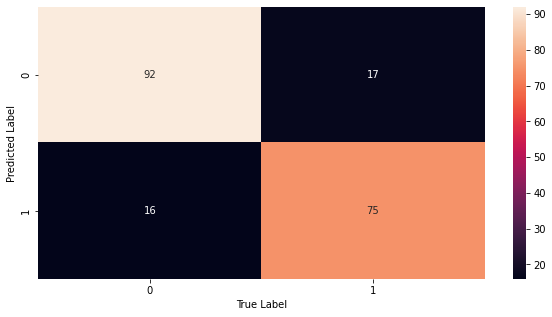



True Positive :  75
True Negative :  92
False Positive :  16
False Negative  :  17


In [ ]:
print("Classification Report:")
print(classification_report(test_y, linear_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(linear_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, linear_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, linear_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.165


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_linear = pd.DataFrame({'prediksi':linear_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_linear = pd.DataFrame(df_result_linear['prediksi'].value_counts()/df_result_linear['prediksi'].count()*100)
df_persen_linear

,prediksi
0,54.50%
1,45.50%


# Polynomial 

In [ ]:
poly = SVC(kernel='poly', C=2)
poly.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='poly')

In [ ]:
scores = cross_val_score(poly, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,train_x_tfidf, train_y, cv=10).mean())

[0.8875 0.8875 0.7125 0.8125 0.75   0.75   0.875  0.7375 0.8125 0.7875]
K-Fold Mean ->  0.8012499999999999


In [ ]:
poly_pred = poly.predict(test_x_tfidf)

In [ ]:
print(confusion_matrix(poly_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, poly_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, poly_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, poly_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, poly_pred)*100)

[[97 22]
 [11 70]]
SVM Accuracy Score ->  83.5
SVM Recall Score ->  76.08695652173914
SVM Precision Score ->  86.41975308641975
SVM f1 Score ->  80.92485549132948


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       108
           1       0.86      0.76      0.81        92

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200


Confusion Matrix:


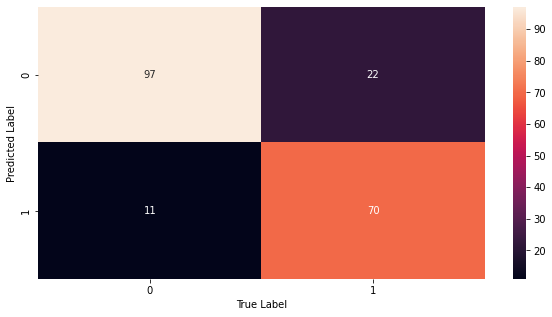



True Positive :  70
True Negative :  97
False Positive :  11
False Negative  :  22


In [ ]:
print("Classification Report:")
print(classification_report(test_y, poly_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(poly_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, poly_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, poly_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.165


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_poly = pd.DataFrame({'prediksi':poly_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_poly = pd.DataFrame(df_result_poly['prediksi'].value_counts()/df_result_poly['prediksi'].count()*100)
df_persen_poly

,prediksi
0,59.50%
1,40.50%


# Radial Basis Function

In [ ]:
rbf = SVC(kernel='rbf', C=2, gamma=0.50)
rbf.fit(train_x_tfidf, train_y)

SVC(C=2, gamma=0.5)

In [ ]:
scores = cross_val_score(rbf, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,train_x_tfidf, train_y, cv=10).mean())

[0.9    0.8875 0.8    0.85   0.875  0.85   0.85   0.85   0.875  0.8375]
K-Fold Mean ->  0.8574999999999999


In [ ]:
rbf_pred = rbf.predict(test_x_tfidf)

In [ ]:
print(confusion_matrix(rbf_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, rbf_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, rbf_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, rbf_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, rbf_pred)*100)

[[94 17]
 [14 75]]
SVM Accuracy Score ->  84.5
SVM Recall Score ->  81.52173913043478
SVM Precision Score ->  84.26966292134831
SVM f1 Score ->  82.87292817679558


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       108
           1       0.84      0.82      0.83        92

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:


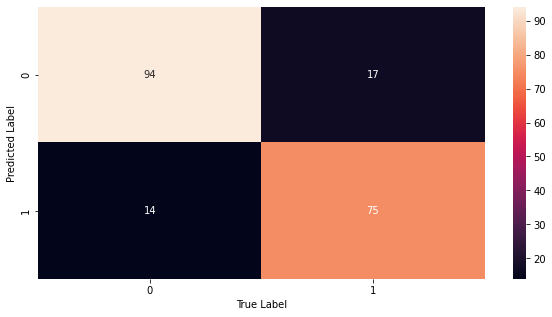



True Positive :  75
True Negative :  94
False Positive :  14
False Negative  :  17


In [ ]:
print("Classification Report:")
print(classification_report(test_y, rbf_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(rbf_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, rbf_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)



In [ ]:
mae = mean_absolute_error(test_y, rbf_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.155


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_rbf = pd.DataFrame({'prediksi':rbf_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_RBF = pd.DataFrame(df_result_rbf['prediksi'].value_counts()/df_result_rbf['prediksi'].count()*100)
df_persen_RBF

,prediksi
0,55.50%
1,44.50%


# Sigmoid

In [ ]:
sig = SVC(kernel='sigmoid', C=2)
sig.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='sigmoid')

In [ ]:
scores = cross_val_score(sig, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,train_x_tfidf, train_y, cv=10).mean())

[0.9    0.8875 0.8    0.8625 0.8625 0.825  0.8375 0.8375 0.8875 0.85  ]
K-Fold Mean ->  0.8550000000000001


In [ ]:
sig_pred = sig.predict(test_x_tfidf)

In [ ]:
print(confusion_matrix(sig_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, sig_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, sig_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, sig_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, sig_pred)*100)

[[92 16]
 [16 76]]
SVM Accuracy Score ->  84.0
SVM Recall Score ->  82.6086956521739
SVM Precision Score ->  82.6086956521739
SVM f1 Score ->  82.6086956521739


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       108
           1       0.83      0.83      0.83        92

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:


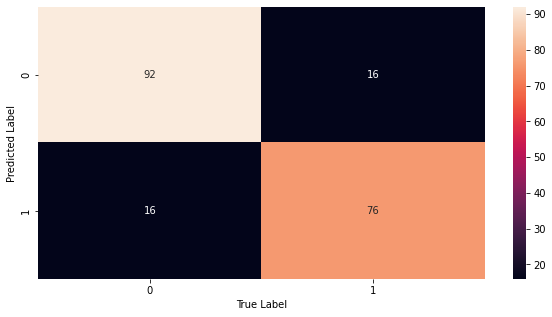



True Positive :  76
True Negative :  92
False Positive :  16
False Negative  :  16


In [ ]:
print("Classification Report:")
print(classification_report(test_y, sig_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(sig_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, sig_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, sig_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.16


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_sig = pd.DataFrame({'prediksi':sig_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_sig = pd.DataFrame(df_result_sig['prediksi'].value_counts()/df_result_sig['prediksi'].count()*100)
df_persen_sig

,prediksi
0,54.00%
1,46.00%
